<a href="https://colab.research.google.com/github/fherline/analysis/blob/master/solution_fransiska_herline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Challenge Notebook - Customer Retention Case for Traveloka
**Overview:** This notebook uses dataset from `tvlk-data-mktscience-dev.data_challenge.customer_lifecycle` and focuses mainly on getting a better understanding about the customer lifecycle segmentation (both validating the segmentation and exploring the users' characteristics).

**Purpose:** The main problem statement that has to be answered from this notebook is how Traveloka can prioritie its strategy when it comes to customers' retention program?

**Flow:** The flow of the notebook to answer the business question is as follow:


1.   Understand the characteristics of Traveloka customers, under each of the to different lifecycle segments.
2.   Analyze and decide which segment should be prioritized for boosting customer retention.
3.   Extract meaningful insights by gaining better understanding on the lifecycle segmentation - evaluating the segments & suggestion for improvement.

**PPT**: https://drive.google.com/open?id=14_pCCJI2pG5SZZT4V0XRtbQYrdUlPNoV

### Importing Libraries & Data from BQ

In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
%%bigquery --project tvlk-econ-analytics-dev df_lifecycle
SELECT *
FROM `tvlk-data-mktscience-dev.data_challenge.customer_lifecycle`

## Data Understanding
Please refer to the following links for detailed documentation of the dataset:
https://29022131.atlassian.net/wiki/x/woMmQQ
https://docs.google.com/spreadsheets/d/14IArjxmHICx54RERtmTNXIXgYf3Y9xrszjwkfxg3dTk/edit?usp=sharing

In [6]:
df_lifecycle.head()

,row_num,profile_id,last_ads_id,snapshot_month,churn_cut_off,first_issued_month,last_issued_month,lifecycle,bucket_gbv_usd_all,bucket_issued_1y,bucket_visit_1y,bucket_search_1y,bucket_gbv_1y,bucket_netrev_1y,bucket_coupon_1y,visit_count_all,search_count_all,issued_count_all,gbv_usd_all,net_revenue_usd_all,coupon_usage_usd_all,burnt_external_points_all,burnt_internal_points_all,earned_points_all,selling_points_all,country,is_registered,is_subscribed,issued_count,sum_gbv_usd,net_revenue_usd,search_count,visit_count,coupon_usage_usd,earned_points,burnt_internal_points,burnt_external_points,selling_points,is_customer,is_churn,product,product_breadth
0,343313,329825,None,2014-12-01,0,2013-06-01,2013-08-01,09. at risk,1,1,1,1,1,1,5,5.0,5.0,5,0,0,0,None,None,None,None,ID,False,0,0,0,0,0,0,0,None,None,None,None,True,True,all,1
1,748191,320465,None,2015-06-01,24,2013-06-01,2013-06-01,09. at risk,1,1,1,1,1,1,5,5.0,5.0,5,0,0,0,None,None,None,None,ID,False,0,0,0,0,0,0,0,None,None,None,None,True,True,all,1
2,778371,320465,None,2014-12-01,0,2013-06-01,2013-06-01,09. at risk,1,1,1,1,1,1,5,5.0,5.0,5,0,0,0,None,None,None,None,ID,False,0,0,0,0,0,0,0,None,None,None,None,True,True,all,1
3,488453,497377,None,2015-04-01,0,2013-06-01,2013-08-01,09. at risk,1,1,1,1,1,1,5,10.0,10.0,10,0,0,0,None,None,None,None,ID,False,0,0,0,0,0,0,0,None,None,None,None,True,True,all,1
4,553369,320465,None,2014-08-01,0,2013-06-01,2013-06-01,09. at risk,1,1,1,1,1,1,5,5.0,5.0,5,0,0,0,None,None,None,None,ID,False,0,0,0,0,0,0,0,None,None,None,None,True,True,all,1


## Data Wrangling
1. Removing columns with null values.
2. Removing rows with incomplete or non-logical data e.g. missing value of GBV, while issuance is not zero.
3. Filtering relevant data: based on country (ID)


1. Removing columns with null values

In [6]:
df_lifecycle.describe()

,row_num,profile_id,churn_cut_off,bucket_gbv_usd_all,bucket_issued_1y,bucket_visit_1y,bucket_search_1y,bucket_gbv_1y,bucket_netrev_1y,bucket_coupon_1y,visit_count_all,search_count_all,is_subscribed,search_count,visit_count,product_breadth
count,1.672331e+06,1.672331e+06,1.672331e+06,1.672331e+06,1.672331e+06,1.672331e+06,1.672331e+06,1.672331e+06,1.672331e+06,1.672331e+06,1.411371e+06,1.397598e+06,1.672331e+06,1.672331e+06,1.672331e+06,1.672331e+06
mean,8.361650e+05,3.915286e+06,1.004442e-01,2.054428e+00,2.180809e+00,2.002321e+00,2.168796e+00,2.346451e+00,1.583178e+00,3.570039e+00,1.041004e+01,1.381525e+01,1.381718e-01,2.746221e+00,1.367223e+00,8.261869e-01
std,4.827605e+05,1.817208e+06,1.549379e+00,1.655455e+00,1.630477e+00,7.705716e-01,9.217087e-01,1.800555e+00,1.494405e+00,2.158969e+00,4.429577e+01,6.179823e+01,3.539494e-01,2.060046e+01,9.209042e+00,5.312288e-01
min,0.000000e+00,1.000900e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.180825e+05,3.222553e+06,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,8.361650e+05,4.027349e+06,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.254248e+06,5.173086e+06,0.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00,7.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.672330e+06,1.110133e+07,2.400000e+01,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,8.804000e+03,1.045000e+04,1.000000e+00,1.040400e+04,8.601000e+03,3.000000e+00


In [7]:
df_lifecycle.count()

row_num                      1672331
profile_id                   1672331
last_ads_id                   325128
snapshot_month               1672331
churn_cut_off                1672331
first_issued_month           1266021
last_issued_month            1266021
lifecycle                    1672331
bucket_gbv_usd_all           1672331
bucket_issued_1y             1672331
bucket_visit_1y              1672331
bucket_search_1y             1672331
bucket_gbv_1y                1672331
bucket_netrev_1y             1672331
bucket_coupon_1y             1672331
visit_count_all              1411371
search_count_all             1397598
issued_count_all             1266021
gbv_usd_all                  1266021
net_revenue_usd_all          1266021
coupon_usage_usd_all         1266021
burnt_external_points_all          0
burnt_internal_points_all          0
earned_points_all                  0
selling_points_all                 0
country                      1411371
is_registered                1672331
i

In [8]:
df_lifecycle.last_ads_id.unique()

array([None, u'b9615878-af2c-462b-b1e2-b70ce184aa32',
       u'd412e071-d01c-4eb1-9405-f4c8acb46425', ...,
       u'64A32D04-92A3-4CC4-B160-4852B7AB243F',
       u'aebde426-8fc4-4bc5-b196-a32476f295fd',
       u'ed265fc0-9500-4f16-b612-804a2babbd6c'], dtype=object)

In [34]:
pd.concat([df_lifecycle["burnt_external_points_all"], df_lifecycle["burnt_internal_points_all"], df_lifecycle['earned_points_all'], \
           df_lifecycle['selling_points_all']]).unique()

array([None], dtype=object)

In [7]:
df_lifecycle_1 = df_lifecycle.dropna(axis=1, how='all')
df_lifecycle_1 = df_lifecycle_1.dropna(axis=0, how='all')
df_lifecycle_1.head()

,row_num,profile_id,last_ads_id,snapshot_month,churn_cut_off,first_issued_month,last_issued_month,lifecycle,bucket_gbv_usd_all,bucket_issued_1y,bucket_visit_1y,bucket_search_1y,bucket_gbv_1y,bucket_netrev_1y,bucket_coupon_1y,visit_count_all,search_count_all,issued_count_all,gbv_usd_all,net_revenue_usd_all,coupon_usage_usd_all,country,is_registered,is_subscribed,issued_count,sum_gbv_usd,net_revenue_usd,search_count,visit_count,coupon_usage_usd,is_customer,is_churn,product,product_breadth
0,343313,329825,None,2014-12-01,0,2013-06-01,2013-08-01,09. at risk,1,1,1,1,1,1,5,5.0,5.0,5,0,0,0,ID,False,0,0,0,0,0,0,0,True,True,all,1
1,748191,320465,None,2015-06-01,24,2013-06-01,2013-06-01,09. at risk,1,1,1,1,1,1,5,5.0,5.0,5,0,0,0,ID,False,0,0,0,0,0,0,0,True,True,all,1
2,778371,320465,None,2014-12-01,0,2013-06-01,2013-06-01,09. at risk,1,1,1,1,1,1,5,5.0,5.0,5,0,0,0,ID,False,0,0,0,0,0,0,0,True,True,all,1
3,488453,497377,None,2015-04-01,0,2013-06-01,2013-08-01,09. at risk,1,1,1,1,1,1,5,10.0,10.0,10,0,0,0,ID,False,0,0,0,0,0,0,0,True,True,all,1
4,553369,320465,None,2014-08-01,0,2013-06-01,2013-06-01,09. at risk,1,1,1,1,1,1,5,5.0,5.0,5,0,0,0,ID,False,0,0,0,0,0,0,0,True,True,all,1


Note: While it is mentioned in the documentation that `snapshot_month` should show the current month of the reporting, there is an indication that this information might be incorrect - by looking at the data. However, I decided to ignore this (assuming the value should be the same with the definition in the documentation).

In [45]:
df_lifecycle_1.snapshot_month.unique()

array([datetime.date(2014, 12, 1), datetime.date(2015, 6, 1),
       datetime.date(2015, 4, 1), datetime.date(2014, 8, 1),
       datetime.date(2015, 7, 1), datetime.date(2015, 5, 1),
       datetime.date(2014, 11, 1), datetime.date(2015, 11, 1),
       datetime.date(2014, 10, 1), datetime.date(2015, 12, 1),
       datetime.date(2014, 7, 1), datetime.date(2015, 2, 1),
       datetime.date(2015, 10, 1), datetime.date(2015, 3, 1),
       datetime.date(2015, 8, 1), datetime.date(2015, 1, 1),
       datetime.date(2015, 9, 1), datetime.date(2014, 9, 1),
       datetime.date(2014, 5, 1), datetime.date(2014, 6, 1),
       datetime.date(2013, 9, 1), datetime.date(2013, 8, 1),
       datetime.date(2013, 6, 1), datetime.date(2013, 5, 1),
       datetime.date(2014, 3, 1), datetime.date(2014, 4, 1),
       datetime.date(2014, 1, 1), datetime.date(2013, 12, 1),
       datetime.date(2013, 7, 1), datetime.date(2014, 2, 1),
       datetime.date(2013, 10, 1), datetime.date(2013, 11, 1),
       datetime

2. Remove rows with missing data/illogical data: e.g. zero GBV values while issuance is not zero.

In [8]:
filtered_df = df_lifecycle_1[(df_lifecycle_1['issued_count_all']>0) & (df_lifecycle_1['gbv_usd_all']==0)]
filtered_df.count()

row_num                 216015
profile_id              216015
last_ads_id               5712
snapshot_month          216015
churn_cut_off           216015
first_issued_month      216015
last_issued_month       216015
lifecycle               216015
bucket_gbv_usd_all      216015
bucket_issued_1y        216015
bucket_visit_1y         216015
bucket_search_1y        216015
bucket_gbv_1y           216015
bucket_netrev_1y        216015
bucket_coupon_1y        216015
visit_count_all         216015
search_count_all        216015
issued_count_all        216015
gbv_usd_all             216015
net_revenue_usd_all     216015
coupon_usage_usd_all    216015
country                 216015
is_registered           216015
is_subscribed           216015
issued_count            216015
sum_gbv_usd             216015
net_revenue_usd         216015
search_count            216015
visit_count             216015
coupon_usage_usd        216015
is_customer             216015
is_churn                216015
product 

In [9]:
df_lifecycle_2 = df_lifecycle_1[(df_lifecycle_1.gbv_usd_all > 0) & (df_lifecycle_1.country == 'ID')]
df_lifecycle_2.count()

row_num                 1045685
profile_id              1045685
last_ads_id              293716
snapshot_month          1045685
churn_cut_off           1045685
first_issued_month      1045685
last_issued_month       1045685
lifecycle               1045685
bucket_gbv_usd_all      1045685
bucket_issued_1y        1045685
bucket_visit_1y         1045685
bucket_search_1y        1045685
bucket_gbv_1y           1045685
bucket_netrev_1y        1045685
bucket_coupon_1y        1045685
visit_count_all         1045685
search_count_all        1045685
issued_count_all        1045685
gbv_usd_all             1045685
net_revenue_usd_all     1045685
coupon_usage_usd_all    1045685
country                 1045685
is_registered           1045685
is_subscribed           1045685
issued_count            1045685
sum_gbv_usd             1045685
net_revenue_usd         1045685
search_count            1045685
visit_count             1045685
coupon_usage_usd        1045685
is_customer             1045685
is_churn

In [55]:
df_lifecycle_2.head()

,row_num,profile_id,last_ads_id,snapshot_month,churn_cut_off,first_issued_month,last_issued_month,lifecycle,bucket_gbv_usd_all,bucket_issued_1y,bucket_visit_1y,bucket_search_1y,bucket_gbv_1y,bucket_netrev_1y,bucket_coupon_1y,visit_count_all,search_count_all,issued_count_all,gbv_usd_all,net_revenue_usd_all,coupon_usage_usd_all,country,is_registered,is_subscribed,issued_count,sum_gbv_usd,net_revenue_usd,search_count,visit_count,coupon_usage_usd,is_customer,is_churn,product,product_breadth
447781,2866,4900566,B935C3BB-7CC1-4E74-8311-CBD10463CF54,2015-09-01,0,2015-02-01,2015-08-01,06. champions,3,5,2,3,4,1,2,8.0,8.0,8,216.218,-58.8597,-8,ID,False,0,0,0,0,0,0,0,True,False,all,2
447782,9332,5119389,a44461aa-4776-4eab-b811-2183127600ae,2015-08-01,0,2015-04-01,2015-08-01,06. champions,4,5,5,5,5,4,5,207.0,182.0,7,571.953,14.96,0,ID,False,0,1,44.7442,1.8889,30,8,0,True,False,all,1
447783,13193,3850520,None,2015-08-01,0,2014-08-01,2015-08-01,06. champions,5,5,2,3,5,4,5,6.0,12.0,24,1804.41,15.9477,0,ID,False,0,4,283.43,5.55405,1,4,0,True,False,all,2
447784,33322,315578,944e38e7-6916-41b7-8014-57daf256a3d2,2015-08-01,0,2013-10-01,2015-08-01,06. champions,5,5,3,3,5,5,5,31.0,31.0,31,2123.28,78.0011,0,ID,False,0,5,385.324,22.0087,5,5,0,True,False,all,1
447785,45820,4943722,4E9987CA-E781-495C-87DC-ABFD6CBA1A79,2015-08-01,0,2015-03-01,2015-08-01,06. champions,5,5,4,5,5,1,1,117.0,161.0,22,1674.71,-3.0676,-79.68,ID,False,0,6,346.271,23.0161,63,37,0,True,False,all,1


### Exploratory Data Analysis
Part 1: Getting the count and summary statistics of each segment to determine the priority segment for the company to focus on when piloting the retention program, as different segment might have different characteristics and thus need a different treatment.

In [0]:
def f(row):
  if row['coupon_usage_usd_all'] == 0:
    val = False
  else:
    val = True
  return val
df_lifecycle_2.loc[:,'ever_use_coupon'] = df_lifecycle_2.apply(lambda row: f(row), axis=1)

In [11]:
grouped_df = df_lifecycle_2.groupby(['lifecycle'])\
              .agg({'profile_id':'count', 'issued_count_all':'sum', 'gbv_usd_all': 'sum', 'net_revenue_usd_all':'sum', 'coupon_usage_usd_all':'sum'})
grouped_df.columns = ['profile_count', 'total_coupon_usd', 'total_gbv_usd', 'total_net_rev_usd', 'total_issuance']
grouped_df = grouped_df.reset_index()
grouped_df.loc[:, 'coupon_to_gbv'] = grouped_df['total_coupon_usd'] / grouped_df['total_gbv_usd']
grouped_df.loc[:, 'gbv_contribution'] = grouped_df['total_gbv_usd'] / grouped_df['total_gbv_usd'].sum(axis=0)
grouped_df.loc[:, 'net_rev_contribution'] = grouped_df['total_net_rev_usd'] / grouped_df['total_net_rev_usd'].sum(axis=0)
grouped_df.loc[:, 'coupon_contribution'] = grouped_df['total_coupon_usd'] / grouped_df['total_coupon_usd'].sum(axis=0)
grouped_df.loc[:, 'profile_share'] = grouped_df['profile_count'] / grouped_df['profile_count'].sum(axis=0)
grouped_df.loc[:, 'gbv_per_person_usd'] = grouped_df['total_gbv_usd'] / grouped_df['profile_count']
grouped_df.loc[:, 'net_rev_per_person_usd'] = grouped_df['total_net_rev_usd'] / grouped_df['profile_count']
grouped_df.loc[:, 'issuance_per_person'] = grouped_df['total_issuance'] / grouped_df['profile_count']
display(grouped_df.sort_values(by=['gbv_contribution'], ascending=False))

,lifecycle,profile_count,total_coupon_usd,total_gbv_usd,total_net_rev_usd,total_issuance,coupon_to_gbv,gbv_contribution,net_rev_contribution,coupon_contribution,profile_share,gbv_per_person_usd,net_rev_per_person_usd,issuance_per_person
5,06. champions,139704,-1.184017e+06,1.732182e+08,2.040833e+06,2207505.0,-0.006835,0.456524,0.464137,0.549234,0.133600,1239.894326,14.608264,15.801301
2,03. promising customer,258022,-2.307486e+05,5.713094e+07,9.279516e+05,610477.0,-0.004039,0.150571,0.211040,0.107038,0.246749,221.418874,3.596405,2.365988
4,05. loyal customer,57622,-3.531909e+05,4.628618e+07,1.960619e+05,611726.0,-0.007631,0.121989,0.044589,0.163836,0.055105,803.272635,3.402552,10.616188
3,04. potential loyalist,109250,-1.841362e+05,4.183242e+07,6.529246e+05,482125.0,-0.004402,0.110251,0.148492,0.085416,0.104477,382.905468,5.976427,4.413043
1,02. recent customer,177881,-6.106203e+04,1.941135e+07,3.190839e+05,177881.0,-0.003146,0.051159,0.072568,0.028325,0.170110,109.125461,1.793805,1.000000
7,08. about to sleep,121752,-6.875885e+04,1.812181e+07,-1.854246e+04,176997.0,-0.003794,0.047761,-0.004217,0.031895,0.116433,148.841961,-0.152297,1.453750
0,01. first time customer,138454,-4.491851e+04,1.437858e+07,2.858228e+05,138454.0,-0.003124,0.037895,0.065003,0.020836,0.132405,103.850948,2.064388,1.000000
6,07. need attention,10500,-1.702761e+04,3.722919e+06,-7.087711e+03,45808.0,-0.004574,0.009812,-0.001612,0.007899,0.010041,354.563690,-0.675020,4.362667
11,12. lost / lapsed / churn,21057,-4.149102e+03,2.465163e+06,0.000000e+00,21057.0,-0.001683,0.006497,0.000000,0.001925,0.020137,117.070969,0.000000,1.000000
10,11. hibernating,8327,-3.159413e+03,1.696648e+06,0.000000e+00,18902.0,-0.001862,0.004472,0.000000,0.001466,0.007963,203.752618,0.000000,2.269965


In [12]:
new_customers = grouped_df[grouped_df.lifecycle.isin(['02. recent customer', '03. promising customer', '01. first time customer'])]
display(new_customers)

,lifecycle,profile_count,total_coupon_usd,total_gbv_usd,total_net_rev_usd,total_issuance,coupon_to_gbv,gbv_contribution,net_rev_contribution,coupon_contribution,profile_share,gbv_per_person_usd,net_rev_per_person_usd,issuance_per_person
0,01. first time customer,138454,-44918.507700,1.437858e+07,285822.807735,138454.0,-0.003124,0.037895,0.065003,0.020836,0.132405,103.850948,2.064388,1.000000
1,02. recent customer,177881,-61062.027333,1.941135e+07,319083.905299,177881.0,-0.003146,0.051159,0.072568,0.028325,0.170110,109.125461,1.793805,1.000000
2,03. promising customer,258022,-230748.600777,5.713094e+07,927951.628419,610477.0,-0.004039,0.150571,0.211040,0.107038,0.246749,221.418874,3.596405,2.365988


In [13]:
new_customers_sum = new_customers[['profile_count', 'gbv_contribution', 'net_rev_contribution', 'coupon_contribution', 'profile_share']].sum(axis=0)
display(new_customers_sum)

profile_count           574357.000000
gbv_contribution             0.239626
net_rev_contribution         0.348611
coupon_contribution          0.156200
profile_share                0.549264
dtype: float64

### Preliminary Findings:
Considering the segment size, GBV, and Net Revenue contribution, it is clear that Traveloka needs to focus to onboard and nurture this new customers and convert them to become loyalist/champions. There is a huge potential benefit by turning these users into a loyalist, as compared to reactivating dormant customers, which are only ~7% of the total population, and might be more costly to revive, since it will require deeper promotion.

## Exploratory Data Analysis
Part 2:
1. Getting a better understanding of the priority segment
2. Defining the persona target (to be achieved after the retention program/north star/goal)
3. Comparing the priority and persona target segment and identifying potential strategies
4. Extract meaningful insights from the exploration.

Step 1: Getting the baseline/average of all users -> 1y avg value of all traveloka users

In [17]:
df_lifecycle_2.describe()

,row_num,profile_id,churn_cut_off,bucket_gbv_usd_all,bucket_issued_1y,bucket_visit_1y,bucket_search_1y,bucket_gbv_1y,bucket_netrev_1y,bucket_coupon_1y,visit_count_all,search_count_all,is_subscribed,search_count,visit_count,product_breadth
count,1.045685e+06,1.045685e+06,1045685.0,1.045685e+06,1.045685e+06,1.045685e+06,1.045685e+06,1.045685e+06,1.045685e+06,1.045685e+06,1.045685e+06,1.045685e+06,1.045685e+06,1.045685e+06,1.045685e+06,1.045685e+06
mean,8.360952e+05,4.340399e+06,0.0,3.067845e+00,3.053488e+00,2.225580e+00,2.454966e+00,3.532169e+00,2.290741e+00,4.682532e+00,1.193880e+01,1.592803e+01,7.565089e-02,3.748991e+00,1.832797e+00,1.109670e+00
std,4.827590e+05,1.528312e+06,0.0,1.216230e+00,1.196203e+00,6.425326e-01,7.758032e-01,1.121182e+00,1.408462e+00,9.128112e-01,4.651939e+01,6.751721e+01,2.729277e-01,2.389737e+01,7.626990e+00,3.132633e-01
min,2.000000e+00,1.035800e+04,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.179850e+05,3.597290e+06,0.0,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,8.360440e+05,4.323368e+06,0.0,3.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,2.000000e+00,5.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.254290e+06,5.310442e+06,0.0,4.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,5.000000e+00,8.000000e+00,8.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.672330e+06,1.110133e+07,0.0,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,8.804000e+03,1.045000e+04,1.000000e+00,1.040400e+04,2.288000e+03,3.000000e+00


Step 2: Selecting the relevant segments: new customers, recent customers, promising customers, loyal customers, and champions.

In [20]:
df_loyalist = df_lifecycle_2[df_lifecycle_2['lifecycle'] == '05. loyal customer']
df_loyalist.describe()

,row_num,profile_id,churn_cut_off,bucket_gbv_usd_all,bucket_issued_1y,bucket_visit_1y,bucket_search_1y,bucket_gbv_1y,bucket_netrev_1y,bucket_coupon_1y,visit_count_all,search_count_all,is_subscribed,search_count,visit_count,product_breadth
count,5.762200e+04,5.762200e+04,57622.0,57622.000000,57622.000000,57622.000000,57622.000000,57622.000000,57622.000000,57622.000000,57622.000000,57622.000000,57622.000000,57622.000000,57622.000000,57622.000000
mean,8.347325e+05,3.205319e+06,0.0,4.329683,4.567509,2.482472,2.983791,4.506820,2.591441,4.282288,23.890493,31.103346,0.172729,2.507810,1.212922,1.218146
std,4.843885e+05,1.661766e+06,0.0,0.767455,0.817016,0.796373,0.779224,0.784683,1.648193,1.316745,77.362186,89.169982,0.396218,13.719146,5.240368,0.412991
min,2.300000e+01,8.003400e+04,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,1.000000
25%,4.128240e+05,2.165593e+06,0.0,4.000000,4.000000,2.000000,3.000000,4.000000,1.000000,4.000000,6.000000,7.000000,0.000000,0.000000,0.000000,1.000000
50%,8.355025e+05,3.509317e+06,0.0,4.000000,5.000000,2.000000,3.000000,5.000000,2.000000,5.000000,9.000000,10.000000,0.000000,0.000000,0.000000,1.000000
75%,1.253958e+06,4.252669e+06,0.0,5.000000,5.000000,3.000000,3.000000,5.000000,4.000000,5.000000,18.000000,23.000000,0.000000,0.000000,0.000000,1.000000
max,1.672264e+06,1.108565e+07,0.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8804.000000,4678.000000,1.000000,963.000000,308.000000,2.000000


In [21]:
df_champions = df_lifecycle_2[df_lifecycle_2['lifecycle'] == '06. champions']
df_champions.describe()

,row_num,profile_id,churn_cut_off,bucket_gbv_usd_all,bucket_issued_1y,bucket_visit_1y,bucket_search_1y,bucket_gbv_1y,bucket_netrev_1y,bucket_coupon_1y,visit_count_all,search_count_all,is_subscribed,search_count,visit_count,product_breadth
count,1.397040e+05,1.397040e+05,139704.0,139704.000000,139704.000000,139704.000000,139704.000000,139704.000000,139704.000000,139704.000000,139704.000000,139704.000000,139704.000000,139704.000000,139704.000000,139704.000000
mean,8.337272e+05,3.606165e+06,0.0,4.565023,4.921112,2.833813,3.284444,4.797801,3.244231,4.037665,37.941934,54.062289,0.145751,13.464174,6.204232,1.339310
std,4.831838e+05,1.620955e+06,0.0,0.634941,0.312943,0.848142,0.763141,0.471869,1.717613,1.457288,93.954701,149.827830,0.364080,47.694079,13.747763,0.475784
min,4.000000e+00,8.003400e+04,0.0,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,1.000000
25%,4.142712e+05,3.205708e+06,0.0,4.000000,5.000000,2.000000,3.000000,5.000000,1.000000,3.000000,8.000000,8.000000,0.000000,1.000000,1.000000,1.000000
50%,8.338775e+05,3.810848e+06,0.0,5.000000,5.000000,3.000000,3.000000,5.000000,4.000000,5.000000,13.000000,15.000000,0.000000,3.000000,2.000000,1.000000
75%,1.252098e+06,4.666543e+06,0.0,5.000000,5.000000,3.000000,4.000000,5.000000,5.000000,5.000000,32.000000,46.000000,0.000000,10.000000,6.000000,2.000000
max,1.672329e+06,1.108565e+07,0.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4800.000000,10404.000000,1.000000,10404.000000,978.000000,3.000000


In [23]:
df_new = df_lifecycle_2[df_lifecycle_2['lifecycle'].isin(['02. recent customer', '01. first time customer'])]
df_new.describe()

,row_num,profile_id,churn_cut_off,bucket_gbv_usd_all,bucket_issued_1y,bucket_visit_1y,bucket_search_1y,bucket_gbv_1y,bucket_netrev_1y,bucket_coupon_1y,visit_count_all,search_count_all,is_subscribed,search_count,visit_count,product_breadth
count,3.163350e+05,3.163350e+05,316335.0,316335.000000,316335.0,316335.000000,316335.000000,316335.000000,316335.000000,316335.000000,316335.000000,316335.000000,316335.000000,316335.000000,316335.000000,316335.000000
mean,8.366888e+05,5.028951e+06,0.0,2.153650,2.0,2.105837,2.194231,2.907313,2.020526,4.883086,4.129464,5.130453,0.031236,1.559179,0.857468,1.001701
std,4.828967e+05,1.314035e+06,0.0,0.918118,0.0,0.360744,0.479449,0.795647,1.067333,0.536503,16.584474,20.630222,0.178369,9.523376,3.581288,0.041205
min,5.000000e+00,1.035800e+04,0.0,1.000000,2.0,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,1.000000
25%,4.182455e+05,4.089285e+06,0.0,1.000000,2.0,2.000000,2.000000,2.000000,1.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,8.373460e+05,5.061846e+06,0.0,2.000000,2.0,2.000000,2.000000,3.000000,2.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.254902e+06,5.985604e+06,0.0,3.000000,2.0,2.000000,2.000000,3.000000,3.000000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.672330e+06,1.110133e+07,0.0,5.000000,2.0,5.000000,5.000000,5.000000,5.000000,5.000000,2255.000000,2083.000000,1.000000,1239.000000,385.000000,2.000000


In [29]:
df_new_coupon = df_new.groupby(['ever_use_coupon']).agg({'profile_id':'count', 'last_ads_id':'count'})
# df_new_coupon.columns = ['profile_count']
display(df_new_coupon)

,profile_id,last_ads_id
ever_use_coupon,,
False,300037,64124
True,16298,6983


In [25]:
df_promise = df_lifecycle_2[df_lifecycle_2['lifecycle'] =='03. promising customer']
df_promise.describe()

,row_num,profile_id,churn_cut_off,bucket_gbv_usd_all,bucket_issued_1y,bucket_visit_1y,bucket_search_1y,bucket_gbv_1y,bucket_netrev_1y,bucket_coupon_1y,visit_count_all,search_count_all,is_subscribed,search_count,visit_count,product_breadth
count,2.580220e+05,2.580220e+05,258022.0,258022.000000,258022.000000,258022.000000,258022.000000,258022.000000,258022.000000,258022.000000,258022.000000,258022.000000,258022.000000,258022.000000,258022.000000,258022.000000
mean,8.368576e+05,4.552784e+06,0.0,3.099561,3.280244,2.211893,2.345901,3.689410,2.437974,4.776546,8.902950,11.333444,0.064119,3.071936,1.578811,1.112343
std,4.822215e+05,1.462672e+06,0.0,0.858776,0.540244,0.521397,0.649071,0.747505,1.332584,0.741852,29.029099,36.753758,0.250920,16.899315,6.994055,0.316537
min,8.000000e+00,8.011200e+04,0.0,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,1.000000
25%,4.198555e+05,3.743381e+06,0.0,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,5.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,8.362520e+05,4.588868e+06,0.0,3.000000,3.000000,2.000000,2.000000,4.000000,2.000000,5.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,1.255046e+06,5.521937e+06,0.0,4.000000,4.000000,2.000000,3.000000,4.000000,4.000000,5.000000,4.000000,4.000000,0.000000,1.000000,1.000000,1.000000
max,1.672328e+06,1.108565e+07,0.0,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2805.000000,4590.000000,1.000000,4589.000000,2190.000000,3.000000


Step 3: Creating visualizations to compare the priority segment and persona target characteristics

In [0]:
def outside_limit(df, label_col, label):
  feature_list = ['bucket_issued_1y', 'bucket_visit_1y', 'bucket_search_1y', 'bucket_gbv_1y', 'bucket_netrev_1y', 'bucket_coupon_1y', \
                  'product_breadth', 'issued_count_all', 'gbv_usd_all', 'net_revenue_usd_all', 'coupon_usage_usd_all']
  
  plot_list = []
  mean_overall_list = []
  mean_cluster_list = []
  
  for i,varname in enumerate(feature_list):
    
    #     get overall mean for a variable, set lower and upper limit
    mean_overall = df[varname].mean()
    lower_limit = mean_overall - (mean_overall*0.25)
    upper_limit = mean_overall + (mean_overall*0.25)

    #     get cluster mean for a variable
    cluster_filter = df[label_col]==label
    pd_cluster = df[cluster_filter]
    mean_cluster = pd_cluster[varname].mean()
    
    #     create filter to display graph with 0.25 deviation from the mean
    if mean_cluster <= lower_limit or mean_cluster >= upper_limit:
      plot_list.append(varname)
      mean_overall_std = mean_overall/mean_overall
      mean_cluster_std = mean_cluster/mean_overall
      mean_overall_list.append(mean_overall_std)
      mean_cluster_list.append(mean_cluster_std)
   
  mean_df = pd.DataFrame({'feature_list':plot_list,
                         'mean_overall_list':mean_overall_list,
                         'mean_cluster_list':mean_cluster_list})
  mean_df = mean_df.sort_values(by=['mean_cluster_list'], ascending=False)
  
  return mean_df

In [0]:
def plot_barchart_all_unique_features(df, label_col, label, ax):
  
  mean_df = outside_limit(df, label_col, label)
  mean_df_to_plot = mean_df.drop(['mean_overall_list'], axis=1)
  
  if len(mean_df.index) != 0:
    sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
                alpha=0.75, dodge=True, ax=ax)

    for i,p in enumerate(ax.patches):
      ax.annotate("{:.02f}".format((p.get_width())), 
                  (1, p.get_y() + p.get_height() / 2.), xycoords=('axes fraction', 'data'),
                  ha='right', va='top', fontsize=10, color='black', rotation=0, 
                  xytext=(0, 0),
                  textcoords='offset pixels')
  
  ax.set_title('Unique Characteristics of Cluster ' + str(label))
  ax.set_xlabel('Standardized Mean')
  ax.axvline(x=1, color='k')


In [0]:
def plot_features_all_cluster(df, label_col):
  plt.close()
  n_plot = 5
  fig, ax = plt.subplots(5, 1, figsize=(8, n_plot*3), sharex='col')
  ax= ax.ravel()
  
  label = ['01. first time customer', '02. recent customer', '03. promising customers', '05. loyal customer', '06. champions']
  for i,a in enumerate(label):
    plot_barchart_all_unique_features(df, label_col, label=a, ax=ax[i])
    ax[i].xaxis.set_tick_params(labelbottom=True)
    
  plt.tight_layout()
  display(fig)

Note: The following figures only display variables where the value of the respective variable in a segment differs with the standardized mean of the total population by +/- 25%. It shows the unique characteristics of each segment, based on what variables stand out in each segment.

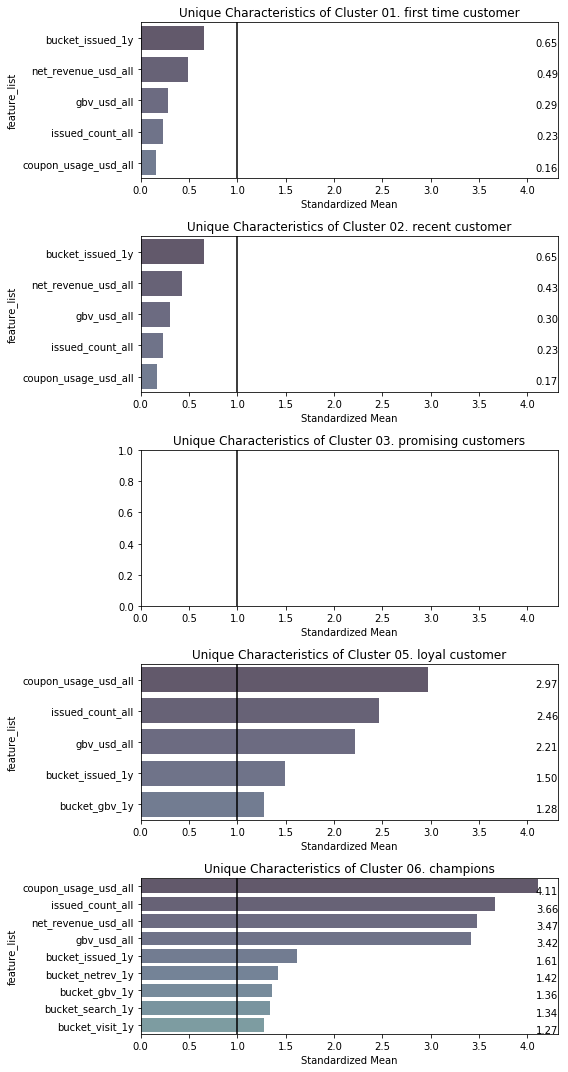

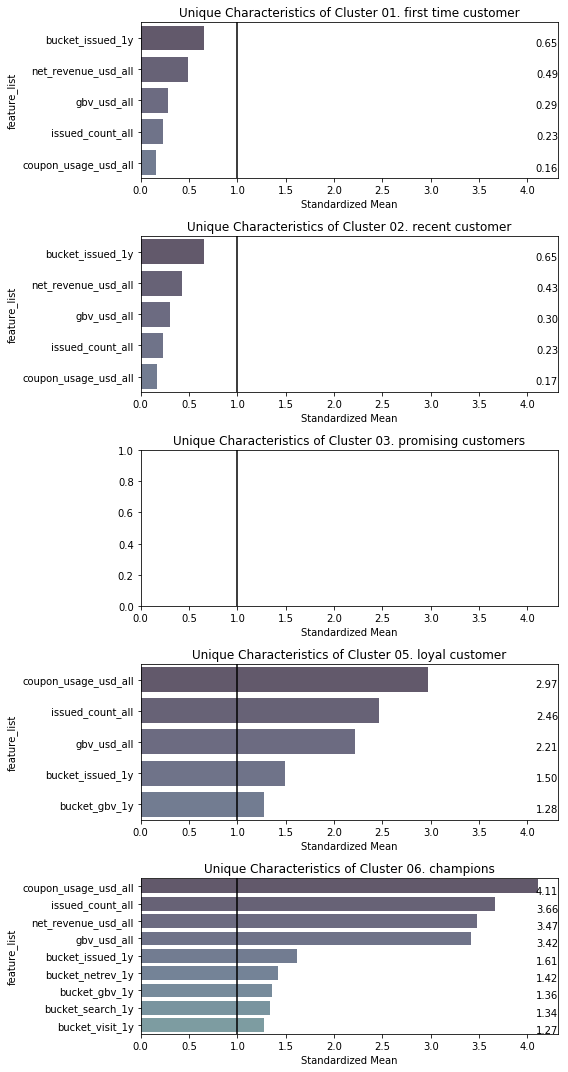

In [62]:
plot_features_all_cluster(df_lifecycle_2, 'lifecycle')

### Results & Interpretations
Preliminary Finding: Considering the segment size, GBV, and Net Revenue contribution, it is clear that Traveloka needs to focus to onboard and nurture this new customers and convert them to become loyalist/champions. There is a huge potential benefit by turning these users into a loyalist, as compared to reactivating dormant customers, which are only ~7% of the total population, and might be more costly to revive, since it will require deeper promotion.

Final Findings:
1. First time and recent customers only have 1 issuance this year, but this number is just slightly under the standardized mean. This indicates that in general, Traveloka users only has 2-3 issuance per year - which in turn, also implies that people still perceive our brand as a travel company - not as discovery platform with various daily needs & lifestyle products.
2. When comparing the metrics ended with `all`, the numbers might not be apple-to-apple, since users have different tenure. Nonetheless, this can be used as the main target --> we should help our users to move to these segment with high lifetime value (loyal customers and champions).
3. Promising customers = average customers --> since there's no unique features that stand out. But, they still need to be treated to ensure that they will move from the ladder to the higher segment.
4. Even for first time & recent customers, they have already actively using our app to search for products, with similar usage to an average user.
5. Notice that the older the user, the higher the coupon usage in USD is. Although it is balanced by the GBV amount, we need to be careful, since this might hurt our net revenue & customer value in the long term. As for the champions segment, it still has a considerably positive net revenue, despite high coupon usage - mainly due to high amount of issuance & GBV.

### Recommendations & Follow Up Analysis
**Strategy Recommendations:**
1. Reduce coupon excessive coupon for all segment, create targeted coupon instead, e.g. for potential new customers. However, we need to slowly reduce coupon usage & create the habit to reduce coupon usage, because it's not beneficial for us and very costly.
2. Create ladder of engagements: educational page to introduce new product (and promote multi product adoption), create missions for new users to follow and thus will generate users' stickiness to the brand.
3. Learn about users' sensitivity toward discount, so that we can gradually reduce coupon & at the same time create a profitability threshold when planning a campaign and targeting a certain segment --> we need to be able to exclude users who are no longer profitable from our targeted promotions.
4. Since each segment has a different lifecycle stage, it is very important for us to offer different type of treatment, or promotion, to increase relevance and create a highly personalized promo.

**Follow up Analysis:**
1. Learn about previously purchased products & the product breadth.
2. Learn about what product to be recommended to the users to increase product breadth using propensity scoring model or product journey approach.
3. Understand the movement from new/recent/promising customers into loyal customers/champions based on the historical data, e.g. natural conversion rate, how did that happen, what triggered them, what treatment worked in the past, etc.).
4. Conduct customers interview to understand why they choose Traveloka and able to become a loyalist.
